                  

<h1><center>Predicting Netflix Profiles  & Detecting Unusual User Activities from User Activities  Data</center></h1>

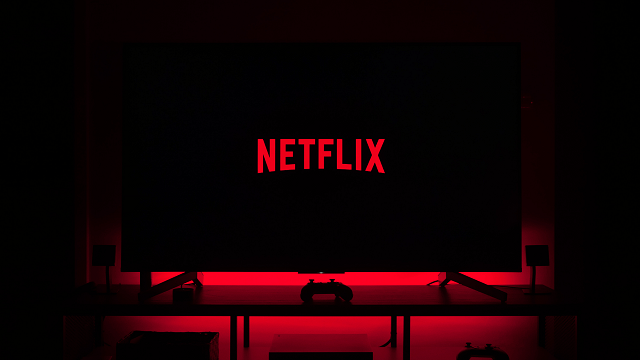

Netflix is one of the most popular subscription streaming service company in Turkey. I am also a Netflix user, I created my account in 2017. The account is used by two different profiles. For this project I requested my Netflix membership data from <a href="https://www.netflix.com/account/getmyinfo">Netflix website </a> 

Netflix e-mailed the Netflix Member Information Request Response data in a zip file. Zip file contains very detailed information from search history to placback details. In this project, I will use the content interaction information. In Content interaction,  Netflix provides several tables, the tables I analyzed for this project are as follows;

#### ViewingActivity (Viewing Activity) - 

*  “Profile Name” - the name of the profile in which viewing occurred. 
* “Start Time” - the UTC date and time viewing started.
* “Duration” - the length of the viewing session.
* “Attributes” - this column shows additional details of interactions with streamed 
content, where available: 
     * “Autoplayed: user action: None” - means that the viewer did not interact with 
    that TV show or movie.
     * “Autoplayed: user action: Unspecified” - means that the viewer either 
    interacted with the TV show or movie (such as clicking on the box art and 
    viewing the TV show or movie page while the auto-played content plays), or 
    that the auto-played content was watched longer than 2 minutes.
     * “Autoplayed: user action: User_Interaction” - means that the viewer 
    interacted with the TV show or movie in a browser, by clicking on the video 
    player controls or using keyboard shortcuts.
     * “View was hidden” - indicates that the TV show or movie was marked “hide 
    from viewing history” in Account settings.
     * “Has branched playback” - indicates that the member can make choices 
    during playback, to control what happens next.
* “Title” - the TV show or movie viewed

#### MyList (My List) - 

My List is created by selecting the “+” symbol in a TV show or 
movie information page while you are browsing through our catalogue.
* “Profile Name” - the name of the profile in which the TV show or movie was added to 
the profile’s My List.
* “Title Name” - the name of the TV show or movie added the profile’s My List.
* “Country” - the country where the TV show or movie was added to the profile’s My 
List.
* “Utc Title Add Date” - the UTC date the TV show or movie was added to the profile’s 
My List

#### Ratings (Ratings) - 

This table contains details of TV show or movie ratings. The 
rating might have been in the form of stars or thumbs up/down depending on when it was 
made.
* “Profile Name” - the name of the profile from which the rating originated. 
* “Title Name” - the name of the TV show or movie for which the rating was given.
* “Rating Type” - the type of rating given to a TV show or movie.
* “Star Value” - the most recent star rating the profile user has given to a particular TV 
show or movie. In this column, the following values have the following meaning: 
    * “0” means the profile user has deleted the rating
    * “-1” means the profile user is not interested in the TV show or movie
    * “-2” means the profile user has indicated in Indicated Preferences (explained 
    in the Indicated Preferences section below) that the TV show or movie has not 
    been seen.
* “Thumbs Value” - the numeric representation of the rating given to a TV show or 
movie. 
    For a thumb Rating Type, the values have the following meaning:
    * “0” means “not rated”
    * “1” means “thumbs down”
    * “2” means “thumbs up”
* “Device Model” - the device model used when rating was given.
* “Event Utc Ts” - the UTC date and time when the rating was given.
* “Region View Date” - the regionalized date when the rating was given.

I changed the Profile Name column values to U1 and U2 before analysis instead of using real user names.

## Business Problem

* Predict the User profile from view activities
* Detect anomalies from viewing activities

## Table of Contents
* [Data](#first-bullet)
* [Exploratory Data Analysis (EDA) & Preprocessing](#second-bullet)
* [Anomally Detection](#fifth-bullet)
* [Predict the User Profiles](#sixth-bullet)

# Data   <a name="first-bullet"></a>

In [557]:
#Libraries are imported 
#EDA
import pandas as pd
import numpy as np
import os
import pickle
#Visualisation
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_palette("dark:salmon_r")
%matplotlib inline
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline,Pipeline
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
#Model Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import make_scorer

## Load the Data

In [558]:
#file_list = os.listdir('./CONTENT_INTERACTION/')

In [559]:
#file_list

In [560]:
"""
d={}
for file in file_list:
    name = str(file[:-4])
    filepath = './CONTENT_INTERACTION/'+str(file)
    d[name] = pd.read_csv(filepath)
    
"""

"\nd={}\nfor file in file_list:\n    name = str(file[:-4])\n    filepath = './CONTENT_INTERACTION/'+str(file)\n    d[name] = pd.read_csv(filepath)\n    \n"

In [561]:
#d["MyList"].info()

In [562]:
#d["Ratings"].info()

In [563]:
#d["ViewingActivity"].info()

In [564]:
#join 3 tables with left join. Viewing Activity is our main source here
#df_temp = pd.merge(d["ViewingActivity"],d["Ratings"],how="left", left_on =["Profile Name","Title"], right_on=["Profile Name","Title Name"])
#df = pd.merge(df_temp, d["MyList"], how="left" , left_on = ["Profile Name","Title"],right_on=["Profile Name","Title Name"])

In [565]:
#change user names --i delete this line to hide real user profile names

In [566]:
#save the dataframe 
#df.to_pickle('my_netflix.pickle')

In [567]:
#read the data
df = pd.read_pickle('my_netflix.pickle')

In [568]:
df.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country_x,Title Name_x,Rating Type,Star Value,Thumbs Value,Device Model,Event Utc Ts,Region View Date,Title Name_y,Country_y,Utc Title Add Date
0,U2,2022-06-04 22:19:56,00:24:02,Autoplayed: user action: None;,The Life and Movies of Erşan Kuneri: Season 1:...,NaN,LG 2015 MTK A5LR Smart TV,00:24:12,00:24:12,TR (Turkey),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U2,2022-06-04 21:26:00,00:53:51,Autoplayed: user action: User_Interaction;,The Life and Movies of Erşan Kuneri: Season 1:...,NaN,LG 2015 MTK A5LR Smart TV,00:53:51,00:53:51,TR (Turkey),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [569]:
len(df.Title.unique())

4032

In [570]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country_x', 'Title Name_x', 'Rating Type', 'Star Value',
       'Thumbs Value', 'Device Model', 'Event Utc Ts', 'Region View Date',
       'Title Name_y', 'Country_y', 'Utc Title Add Date'],
      dtype='object')

In [571]:
#create IsInList flag
df["IsInList"] = [int(not(x)) for x in df["Utc Title Add Date"].isna()]
#create has rated flag
df["HasRated"] = [int(not(x)) for x in df["Rating Type"].isna()]

In [572]:
df.rename(columns = {'Country_x':'Country'}, inplace = True)

# Exploratory Data Analysis (EDA)  <a name="second-bullet"></a>

In [573]:
colors = ["#E50914","#000000","#564d4d","#831010"]

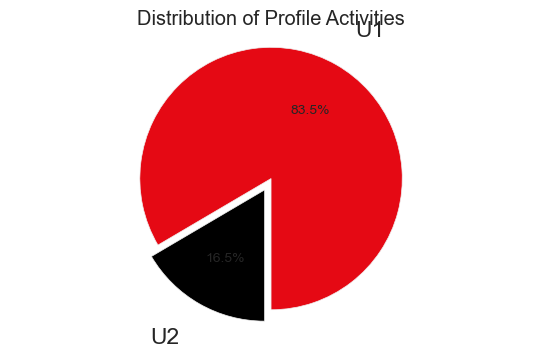

In [574]:
plt.figure(dpi=100)
size = 0.3
plt.pie(df.value_counts("Profile Name"), 
        labels= df.value_counts("Profile Name").index,
        autopct='%0.1f%%',
        explode = [0, 0.1],
        labeldistance=1.3,
        startangle = -90,
       colors=colors)

plt.axis("equal")
plt.title("Distribution of Profile Activities")
plt.show()

Data is highly imbalanced. 

#### Device Type

In [575]:
df.groupby("Profile Name")["Device Type"].value_counts()

Profile Name  Device Type                                   
U1            Chrome PC (Cadmium)                               2931
              Xiaomi aquaman Streaming Stick                    1186
              Android DefaultWidevineL3Phone Android Phone      1075
              Windows 8 x86 devices                              342
              LG 2015 MTK A5LR Smart TV                           17
              DefaultWidevineAndroidPhone                         13
              Mobile                                               4
              Samsung 2017 Kant-M UHD TV Smart TV                  3
U2            LG 2015 MTK A5LR Smart TV                          820
              Apple iPhone 7 (GSM)                               229
              LG 2014 LG SoC Smart TV                             31
              Xiaomi aquaman Streaming Stick                      15
              Android DefaultWidevineL3Tablet Android Tablet       7
              Chrome PC (Cadmium)         

In [576]:
user1_name = df["Profile Name"].unique()[0]
user2_name = df["Profile Name"].unique()[1]
user1 = df[df["Profile Name"]==user1_name]
user2 = df[df["Profile Name"]==user2_name]

<Figure size 600x400 with 0 Axes>

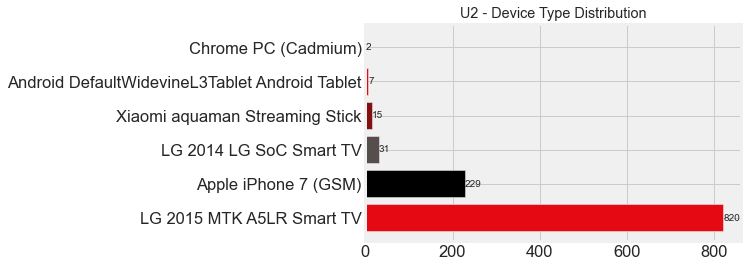

In [577]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(user1["Device Type"].value_counts().index,user1["Device Type"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title(user1_name + " - Device Type Distribution")
plt.show()

<Figure size 600x400 with 0 Axes>

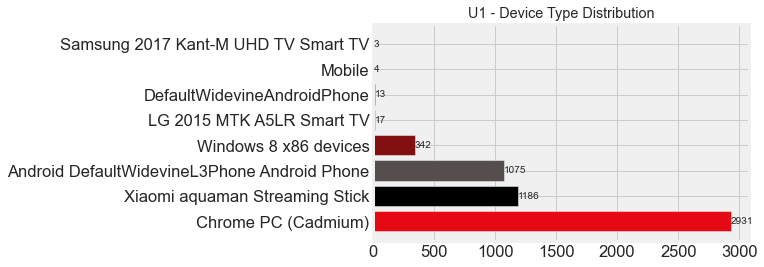

In [578]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(user2["Device Type"].value_counts().index,user2["Device Type"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title(user2_name + " - Device Type Distribution")
plt.show()


<Figure size 600x400 with 0 Axes>

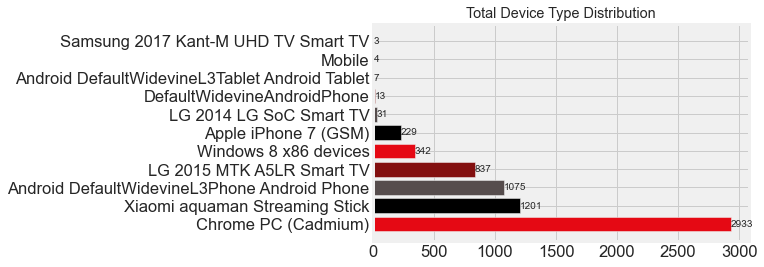

In [579]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(df["Device Type"].value_counts().index,df["Device Type"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title("Total Device Type Distribution")
plt.show()

Device Type values are very user spesific, so I will convert the device types to these cathegories;

* PC
* Tablet
* TV
* Phone

In [580]:
def convertDeviceType(device):
    if "TV" in device or "Streaming Stick" in device:
        return "TV"
    elif "Phone" in device or "GSM" in device:
        return "Phone"
    elif "Tablet" in device:
        return "Tablet"
    elif "PC" in device or "x86 device" in device:
        return "PC"
    

In [581]:
df["Device Type"].value_counts()

Chrome PC (Cadmium)                               2933
Xiaomi aquaman Streaming Stick                    1201
Android DefaultWidevineL3Phone Android Phone      1075
LG 2015 MTK A5LR Smart TV                          837
Windows 8 x86 devices                              342
Apple iPhone 7 (GSM)                               229
LG 2014 LG SoC Smart TV                             31
DefaultWidevineAndroidPhone                         13
Android DefaultWidevineL3Tablet Android Tablet       7
Mobile                                               4
Samsung 2017 Kant-M UHD TV Smart TV                  3
Name: Device Type, dtype: int64

In [582]:
df["Device Type"].map(convertDeviceType).value_counts()

PC        3275
TV        2072
Phone     1317
Tablet       7
Name: Device Type, dtype: int64

In [583]:
df["Device Type"] = df["Device Type"].map(convertDeviceType)

In [584]:
df["Device Type"].value_counts()

PC        3275
TV        2072
Phone     1317
Tablet       7
Name: Device Type, dtype: int64

<Figure size 600x400 with 0 Axes>

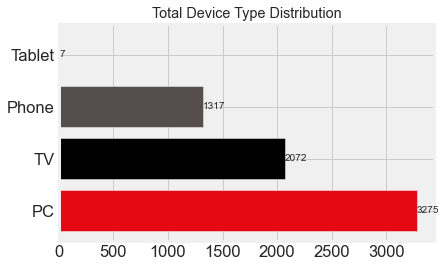

In [585]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(df["Device Type"].value_counts().index,df["Device Type"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title("Total Device Type Distribution")
plt.show()

#### Country

<Figure size 600x400 with 0 Axes>

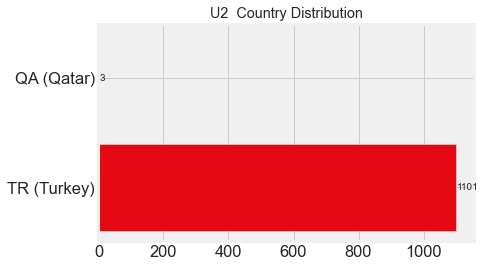

In [586]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(user1["Country"].value_counts().index,user1["Country"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title(user1_name + "  Country Distribution")
plt.show()

<Figure size 600x400 with 0 Axes>

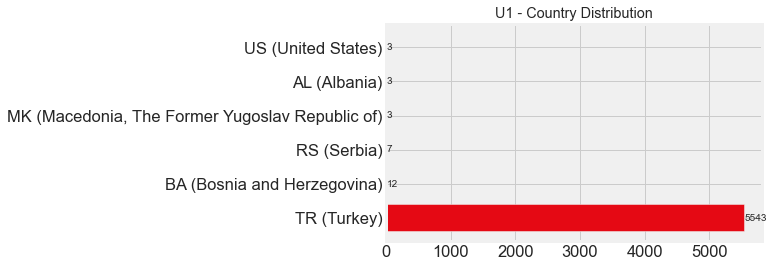

In [587]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(user2["Country"].value_counts().index,user2["Country"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title(user2_name + " - Country Distribution")
plt.show()

In [588]:
df["Country"].value_counts()

TR (Turkey)                                        6644
BA (Bosnia and Herzegovina)                          12
RS (Serbia)                                           7
QA (Qatar)                                            3
MK (Macedonia, The Former Yugoslav Republic of)       3
AL (Albania)                                          3
US (United States)                                    3
Name: Country, dtype: int64

In [589]:
df.Country = df.Country.apply(lambda x: x if x=="TR (Turkey)" else "Foreign Country")

In [590]:
df.Country.value_counts()

TR (Turkey)        6644
Foreign Country      31
Name: Country, dtype: int64

<Figure size 600x400 with 0 Axes>

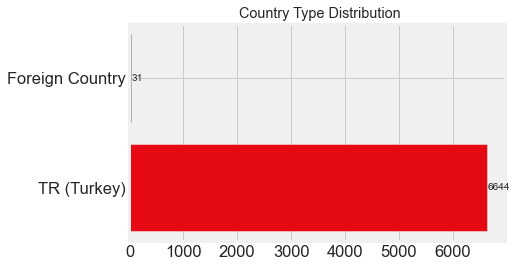

In [591]:
plt.figure(dpi=100)
fig, ax = plt.subplots()
bars = ax.barh(df["Country"].value_counts().index,df["Country"].value_counts(),color=colors)
ax.bar_label(bars)
plt.title(" Country Type Distribution")
plt.show()

### Date Columns

In [592]:
#convert date features to datetime
df["Duration"] = pd.to_datetime(df["Duration"])
df["Start Time"] = pd.to_datetime(df["Start Time"])
df["Bookmark"] = pd.to_datetime(df["Bookmark"])

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6674
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Profile Name             6675 non-null   object        
 1   Start Time               6675 non-null   datetime64[ns]
 2   Duration                 6675 non-null   datetime64[ns]
 3   Attributes               3429 non-null   object        
 4   Title                    6675 non-null   object        
 5   Supplemental Video Type  2137 non-null   object        
 6   Device Type              6671 non-null   object        
 7   Bookmark                 6675 non-null   datetime64[ns]
 8   Latest Bookmark          6675 non-null   object        
 9   Country                  6675 non-null   object        
 10  Title Name_x             113 non-null    object        
 11  Rating Type              113 non-null    object        
 12  Star Value               4 non-nul

In [594]:
df["Total Duration"] = round((df.Duration.dt.hour*60+df.Duration.dt.minute+df.Duration.dt.second/60),2)

<Figure size 300x200 with 0 Axes>

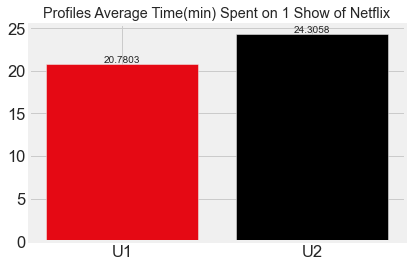

In [595]:
plt.figure(dpi=50)
fig, ax = plt.subplots()
bars = ax.bar(df.groupby("Profile Name")["Total Duration"].mean().index,df.groupby("Profile Name")["Total Duration"].mean(),color=colors)
ax.bar_label(bars)
plt.title("Profiles Average Time(min) Spent on 1 Show of Netflix")
plt.show()

In [596]:
df.groupby("Profile Name")["Total Duration"].mean()

Profile Name
U1    20.780260
U2    24.305752
Name: Total Duration, dtype: float64

<Figure size 300x200 with 0 Axes>

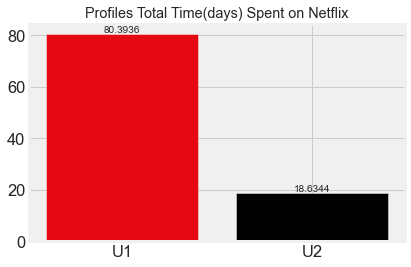

In [597]:
plt.figure(dpi=50)
fig, ax = plt.subplots()
bars = ax.bar(df.groupby("Profile Name")["Total Duration"].sum().index,df.groupby("Profile Name")["Total Duration"].sum()/(60*24),color=colors)
ax.bar_label(bars)
plt.title("Profiles Total Time(days) Spent on Netflix")
plt.show()

In [598]:
df.groupby("Profile Name")["Total Duration"].sum()

Profile Name
U1    115766.83
U2     26833.55
Name: Total Duration, dtype: float64

In [599]:
#Add year,month, day and hour of sart time features to data frame
df["Year of Start"] = df["Start Time"].dt.year
df["Month of Start"] = df["Start Time"].dt.month
df["Day of Start"] = df["Start Time"].dt.day
df["Hour of Start"] = df["Start Time"].dt.hour
df["Weekday of Start"] = df["Start Time"].dt.weekday


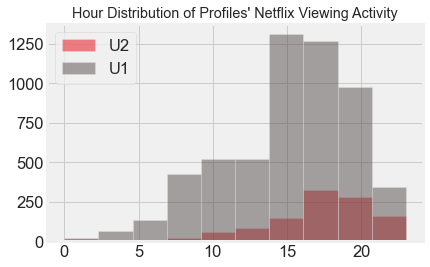

In [600]:
plt.hist(df[df["Profile Name"]==user1_name]["Hour of Start"],color=colors[0],alpha=0.5)
plt.hist(df[df["Profile Name"]==user2_name]["Hour of Start"],color=colors[2],alpha=0.5)
plt.title("Hour Distribution of Profiles' Netflix Viewing Activity")
plt.legend(df["Profile Name"].unique())
plt.show()

In [601]:
df[df["Profile Name"]==user1_name].groupby("Hour of Start")["Title"].count().sort_values(ascending=False)[0:5]

Hour of Start
17    176
19    171
18    151
20    107
21     84
Name: Title, dtype: int64

In [602]:
df[df["Profile Name"]==user2_name].groupby("Hour of Start")["Title"].count().sort_values(ascending=False)[0:5]

Hour of Start
17    640
18    624
19    548
16    511
15    507
Name: Title, dtype: int64

<Figure size 300x200 with 0 Axes>

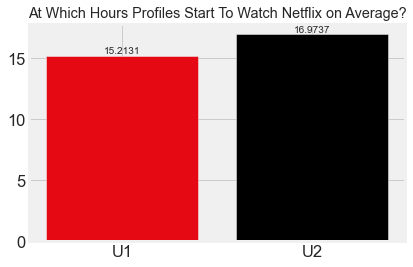

In [603]:
plt.figure(dpi=50)
fig, ax = plt.subplots()
bars = ax.bar(df.groupby("Profile Name")["Hour of Start"].mean().index,df.groupby("Profile Name")["Hour of Start"].mean(),color=colors)
ax.bar_label(bars)
plt.title("At Which Hours Profiles Start To Watch Netflix on Average?")
plt.show()

In [604]:
df.groupby("Profile Name")["Hour of Start"].mean()

Profile Name
U1    15.213068
U2    16.973732
Name: Hour of Start, dtype: float64

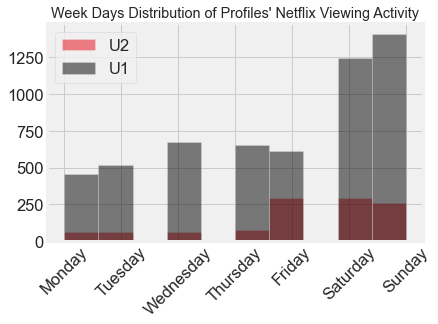

In [605]:
weekdays = ['Monday','Tuesday' ,'Wednesday' , 'Thursday' , 'Friday', 'Saturday' , 'Sunday']
plt.hist(df[df["Profile Name"]==user1_name]["Weekday of Start"],color=colors[0],alpha=0.5)
plt.hist(df[df["Profile Name"]==user2_name]["Weekday of Start"],color=colors[1],alpha=0.5)
plt.xticks(np.arange(0,7),weekdays,rotation=45)
plt.title("Week Days Distribution of Profiles' Netflix Viewing Activity")
plt.legend(df["Profile Name"].unique())
plt.show()

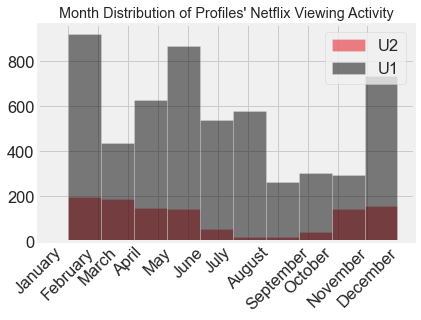

In [606]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.hist(df[df["Profile Name"]==user1_name]["Month of Start"],color=colors[0],alpha=0.5)
plt.hist(df[df["Profile Name"]==user2_name]["Month of Start"],color=colors[1],alpha=0.5)
plt.xticks(np.arange(0,12),months,rotation=45)
plt.title("Month Distribution of Profiles' Netflix Viewing Activity")
plt.legend(df["Profile Name"].unique())
plt.show()

In [607]:
df["Star Value"].value_counts()

5.0    3
4.0    1
Name: Star Value, dtype: int64

In [608]:
df["Thumbs Value"].value_counts()

2.0    81
1.0    32
Name: Thumbs Value, dtype: int64

In [609]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Country_y,Utc Title Add Date,IsInList,HasRated,Total Duration,Year of Start,Month of Start,Day of Start,Hour of Start,Weekday of Start
0,U2,2022-06-04 22:19:56,2022-06-25 00:24:02,Autoplayed: user action: None;,The Life and Movies of Erşan Kuneri: Season 1:...,NaN,TV,2022-06-25 00:24:12,00:24:12,TR (Turkey),...,NaN,NaN,0,0,24.03,2022,6,4,22,5
1,U2,2022-06-04 21:26:00,2022-06-25 00:53:51,Autoplayed: user action: User_Interaction;,The Life and Movies of Erşan Kuneri: Season 1:...,NaN,TV,2022-06-25 00:53:51,00:53:51,TR (Turkey),...,NaN,NaN,0,0,53.85,2022,6,4,21,5
2,U2,2022-06-04 21:25:39,2022-06-25 00:00:08,Autoplayed: user action: None;,Season 1 Main Character Intro Clip: The Uysals,HOOK,TV,2022-06-25 00:00:08,00:00:08,TR (Turkey),...,NaN,NaN,0,0,0.13,2022,6,4,21,5
3,U2,2022-06-04 21:25:17,2022-06-25 00:00:09,Autoplayed: user action: None;,Brother in Love 2_hook_primary_16x9,HOOK,TV,2022-06-25 00:00:09,00:00:09,TR (Turkey),...,NaN,NaN,0,0,0.15,2022,6,4,21,5
4,U2,2022-06-04 21:25:03,2022-06-25 00:00:08,Autoplayed: user action: None;,Trailer: Godspeed,TRAILER,TV,2022-06-25 00:00:08,00:00:08,TR (Turkey),...,NaN,NaN,0,0,0.13,2022,6,4,21,5


In [610]:
df.isna().sum()

Profile Name                  0
Start Time                    0
Duration                      0
Attributes                 3246
Title                         0
Supplemental Video Type    4538
Device Type                   4
Bookmark                      0
Latest Bookmark               0
Country                       0
Title Name_x               6562
Rating Type                6562
Star Value                 6671
Thumbs Value               6562
Device Model               6562
Event Utc Ts               6562
Region View Date           6671
Title Name_y               6515
Country_y                  6515
Utc Title Add Date         6515
IsInList                      0
HasRated                      0
Total Duration                0
Year of Start                 0
Month of Start                0
Day of Start                  0
Hour of Start                 0
Weekday of Start              0
dtype: int64

In [611]:
df = df.fillna(0)

In [612]:
df.isna().sum()

Profile Name               0
Start Time                 0
Duration                   0
Attributes                 0
Title                      0
Supplemental Video Type    0
Device Type                0
Bookmark                   0
Latest Bookmark            0
Country                    0
Title Name_x               0
Rating Type                0
Star Value                 0
Thumbs Value               0
Device Model               0
Event Utc Ts               0
Region View Date           0
Title Name_y               0
Country_y                  0
Utc Title Add Date         0
IsInList                   0
HasRated                   0
Total Duration             0
Year of Start              0
Month of Start             0
Day of Start               0
Hour of Start              0
Weekday of Start           0
dtype: int64

In [613]:
df.groupby("Title").count().iloc[:,:1]

,Profile Name
Title,
#Alive,2
#Anne Frank - Parallel Stories_hook_primary_16x9,2
#AnneFrank - Parallel Stories,2
(Un)Well: Season 1: Essential Oils (Episode 1),1
(Un)Well: Season 1: Essential Oils Episodic Hook,1
...,...
İncir Reçeli 2,2
İyi ki Yapmışım_hook_02_16x9,1
İyi ki Yapmışım_hook_03_16x9,2


In [614]:
#get the total number of views of profiles for each title
df.groupby(["Title","Profile Name"]).count()["Device Type"]

Title                                             Profile Name
#Alive                                            U1              2
#Anne Frank - Parallel Stories_hook_primary_16x9  U1              2
#AnneFrank - Parallel Stories                     U1              1
                                                  U2              1
(Un)Well: Season 1: Essential Oils (Episode 1)    U2              1
                                                                 ..
İncir Reçeli 2                                    U2              2
İyi ki Yapmışım_hook_02_16x9                      U1              1
İyi ki Yapmışım_hook_03_16x9                      U2              2
İyi ki Yapmışım_hook_primary_16x9                 U2              1
Şansımı Seveyim                                   U2              1
Name: Device Type, Length: 4346, dtype: int64

In [615]:
#create a new dataframe for "number of times wached" for each title
seri= df.groupby(["Title","Profile Name"]).count()["Device Type"]
df1 = pd.DataFrame(seri)
df1.columns = ["NumberOfTimesWatched"]

In [616]:
df1

NumberOfTimesWatched
Title                                            Profile Name                      
#Alive                                           U1                               2
#Anne Frank - Parallel Stories_hook_primary_16x9 U1                               2
#AnneFrank - Parallel Stories                    U1                               1
                                                 U2                               1
(Un)Well: Season 1: Essential Oils (Episode 1)   U2                               1
...                                                                             ...
İncir Reçeli 2                                   U2                               2
İyi ki Yapmışım_hook_02_16x9                     U1                               1
İyi ki Yapmışım_hook_03_16x9                     U2                               2
İyi ki Yapmışım_hook_primary_16x9                U2                               1
Şansımı Seveyim                                  U2                               1

[4346 rows x 1 columns]

In [617]:
#add the new column to df dataframe
df = pd.merge(df, df1, on=['Title',"Profile Name"], how='inner')

In [618]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Utc Title Add Date,IsInList,HasRated,Total Duration,Year of Start,Month of Start,Day of Start,Hour of Start,Weekday of Start,NumberOfTimesWatched
0,U2,2022-06-04 22:19:56,2022-06-25 00:24:02,Autoplayed: user action: None;,The Life and Movies of Erşan Kuneri: Season 1:...,0,TV,2022-06-25 00:24:12,00:24:12,TR (Turkey),...,0,0,0,24.03,2022,6,4,22,5,1
1,U2,2022-06-04 21:26:00,2022-06-25 00:53:51,Autoplayed: user action: User_Interaction;,The Life and Movies of Erşan Kuneri: Season 1:...,0,TV,2022-06-25 00:53:51,00:53:51,TR (Turkey),...,0,0,0,53.85,2022,6,4,21,5,1
2,U2,2022-06-04 21:25:39,2022-06-25 00:00:08,Autoplayed: user action: None;,Season 1 Main Character Intro Clip: The Uysals,HOOK,TV,2022-06-25 00:00:08,00:00:08,TR (Turkey),...,0,0,0,0.13,2022,6,4,21,5,1
3,U2,2022-06-04 21:25:17,2022-06-25 00:00:09,Autoplayed: user action: None;,Brother in Love 2_hook_primary_16x9,HOOK,TV,2022-06-25 00:00:09,00:00:09,TR (Turkey),...,0,0,0,0.15,2022,6,4,21,5,1
4,U2,2022-06-04 21:25:03,2022-06-25 00:00:08,Autoplayed: user action: None;,Trailer: Godspeed,TRAILER,TV,2022-06-25 00:00:08,00:00:08,TR (Turkey),...,0,0,0,0.13,2022,6,4,21,5,1


In [619]:
#assign the Title column as the index of the df dataframe
#df.index = df.Title

In [620]:
#drop the Title column
#df = df.drop(["Title"],axis=1)

In [621]:
df.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,Utc Title Add Date,IsInList,HasRated,Total Duration,Year of Start,Month of Start,Day of Start,Hour of Start,Weekday of Start,NumberOfTimesWatched
0,U2,2022-06-04 22:19:56,2022-06-25 00:24:02,Autoplayed: user action: None;,The Life and Movies of Erşan Kuneri: Season 1:...,0,TV,2022-06-25 00:24:12,00:24:12,TR (Turkey),...,0,0,0,24.03,2022,6,4,22,5,1
1,U2,2022-06-04 21:26:00,2022-06-25 00:53:51,Autoplayed: user action: User_Interaction;,The Life and Movies of Erşan Kuneri: Season 1:...,0,TV,2022-06-25 00:53:51,00:53:51,TR (Turkey),...,0,0,0,53.85,2022,6,4,21,5,1


#### Top 3 Shows By Years

In [622]:
df.groupby(["Year of Start", df["Title"]]).count().sort_values(["Year of Start", "NumberOfTimesWatched"],
                                                ascending=False).groupby(level=0).head(3).iloc[:,:0]


Empty DataFrame
Columns: []
Index: [(2022, 9,75_hook_05_16x9), (2022, Trailer: Bad Vegan: Fame. Fraud. Fugitives.), (2022, Don't Look Up), (2021, Season 1 Trailer: Fatma), (2021, Blind Love_hook_primary_16x9), (2021, Squid Game: Season 1: Red Light, Green Light (Episode 1)), (2020, Ozark: Season 3: Boss Fight (Episode 4)), (2020, Season 1 Trailer: Hollywood), (2020, Season 1 Trailer: White Lines), (2019, HOMECOMING: A film by Beyoncé), (2019, Mirage), (2019, The Imitation Game), (2018, The Secret), (2018, Dany Boon: Des Hauts De France), (2018, Gaga: Five Foot Two), (2017, Stranger Things: Stranger Things 2: Chapter One: MADMAX (Episode 1)), (2017, What the Health), (2017, Banking on Bitcoin)]

In [623]:
#Most watched show in total
df.groupby(df.Title)["NumberOfTimesWatched"].count().sort_values(ascending=False)[0:10]

Title
The Secret                                 11
Season 1 Trailer: Hollywood                10
Season 1 Trailer: Fatma                    10
Season 1 Trailer: White Lines              10
HOMECOMING: A film by Beyoncé              10
Ozark: Season 3: Boss Fight (Episode 4)    10
What Men Want                              10
Bikram: Yogi, Guru, Predator                9
Ethos: Season 1: Episode 1                  9
Blind Love_hook_primary_16x9                9
Name: NumberOfTimesWatched, dtype: int64

In [624]:
df.columns

Index(['Profile Name', 'Start Time', 'Duration', 'Attributes', 'Title',
       'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark',
       'Country', 'Title Name_x', 'Rating Type', 'Star Value', 'Thumbs Value',
       'Device Model', 'Event Utc Ts', 'Region View Date', 'Title Name_y',
       'Country_y', 'Utc Title Add Date', 'IsInList', 'HasRated',
       'Total Duration', 'Year of Start', 'Month of Start', 'Day of Start',
       'Hour of Start', 'Weekday of Start', 'NumberOfTimesWatched'],
      dtype='object')

In [625]:
#Most watched shows of each profiles
df.pivot_table(columns=["Profile Name"],
               index=df["Title"],
               values="NumberOfTimesWatched").sort_values(by=df["Profile Name"].unique()[0],ascending=False)[0:10]

Profile Name,U1,U2
Title,,
Blind Love_hook_primary_16x9,2.0,7.0
The Protector: Season 1: Episode 1,1.0,5.0
You're Everything To Me,NaN,5.0
Tamam mıyız?,NaN,5.0
Kiz Kardesler_hook_03_16x9,1.0,5.0
"The Mind, Explained: Season 1: Anxiety (Episode 3)",1.0,5.0
PK,2.0,5.0
Rise of Empires: Ottoman: Season 1: The New Sultan (Episode 1),2.0,5.0
Lupin: Part 1: Chapter 1 (Episode 1),1.0,5.0


In [626]:
df.pivot_table(columns=["Profile Name"],
               index=df["Title"],
               values="NumberOfTimesWatched").sort_values(by=df["Profile Name"].unique()[1],ascending=False)[0:10]

Profile Name,U1,U2
Title,,
Ozark: Season 3: Boss Fight (Episode 4),10.0,NaN
Season 1 Trailer: White Lines,10.0,NaN
HOMECOMING: A film by Beyoncé,10.0,NaN
The Secret,10.0,1.0
What Men Want,10.0,NaN
Season 1 Trailer: Hollywood,10.0,NaN
6 Underground,9.0,NaN
Mirage,8.0,NaN
Dany Boon: Des Hauts De France,8.0,NaN


In [627]:
#filter activities lasting more than 10 minutes
filtered = df[df["Total Duration"]>10]

In [628]:
filtered.pivot_table(columns=["Profile Name"],
               index=filtered["Title"],
               values="NumberOfTimesWatched").sort_values(by=filtered["Profile Name"].unique()[0],ascending=False)[0:10]

Profile Name,U1,U2
Title,,
You're Everything To Me,NaN,5.0
PK,2.0,5.0
Rise of Empires: Ottoman: Season 1: The New Sultan (Episode 1),2.0,5.0
50M2: Season 1: Episode 1,1.0,5.0
"The Mind, Explained: Season 1: Anxiety (Episode 3)",1.0,5.0
Tamam mıyız?,NaN,5.0
The Gift: Season 1: Episode 4,1.0,4.0
Salt Fat Acid Heat: Season 1: Fat (Episode 1),NaN,4.0
My Travel Buddy,NaN,4.0


In [629]:
filtered.pivot_table(columns=["Profile Name"],
               index=filtered["Title"],
               values="NumberOfTimesWatched").sort_values(by=filtered["Profile Name"].unique()[1],ascending=False)[0:10]

Profile Name,U1,U2
Title,,
The Secret,10.0,NaN
What Men Want,10.0,NaN
Ozark: Season 3: Boss Fight (Episode 4),10.0,NaN
HOMECOMING: A film by Beyoncé,10.0,NaN
6 Underground,9.0,NaN
Dany Boon: Des Hauts De France,8.0,NaN
Gaga: Five Foot Two,8.0,NaN
Mirage,8.0,NaN
The Imitation Game,8.0,NaN


In [630]:
df = df.drop(['Attributes','Supplemental Video Type','Device Model', 'Event Utc Ts',
       'Region View Date', 'Title Name_y', 'Country_y','Bookmark', 'Latest Bookmark',"Title Name_x","Start Time","Duration","Utc Title Add Date","Rating Type"], axis=1)

<AxesSubplot:xlabel='Year of Start', ylabel='Profile Name'>

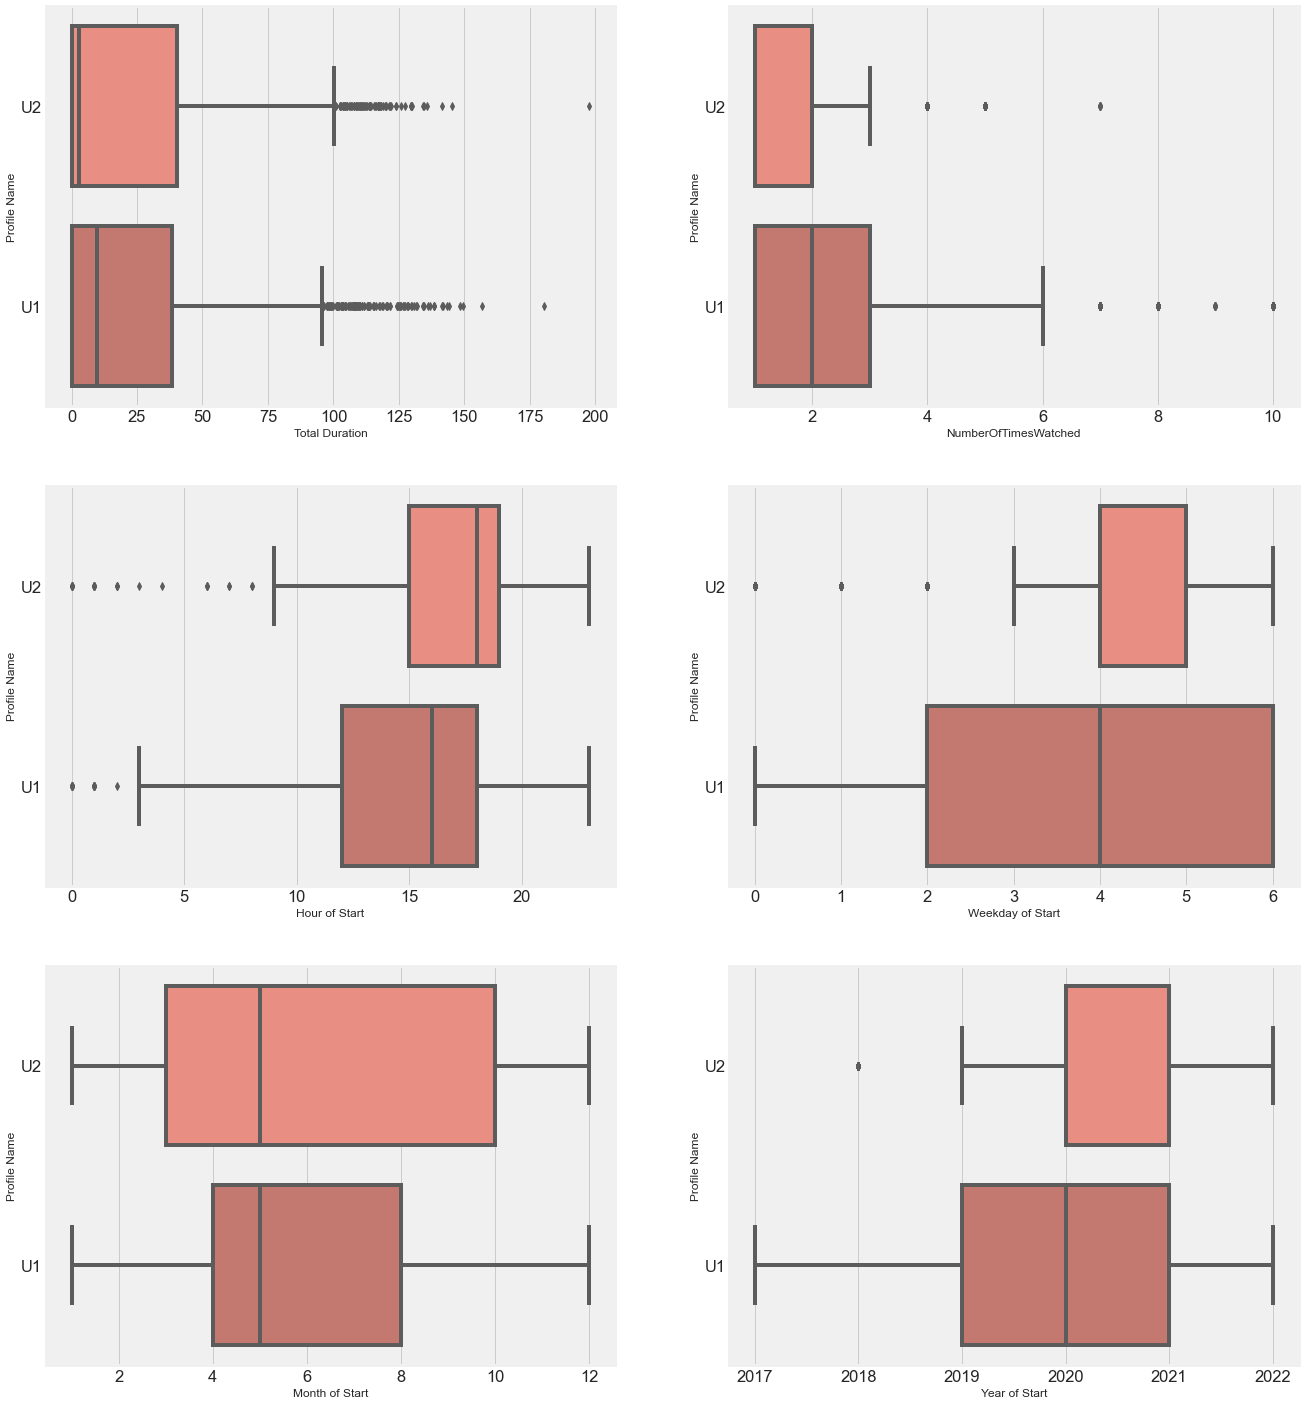

In [631]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 25))
sns.boxplot(x='Total Duration',y="Profile Name",data = df, ax=axarr[0][0])
sns.boxplot(x='NumberOfTimesWatched',y="Profile Name",data = df , ax=axarr[0][1])
sns.boxplot(x='Hour of Start',y="Profile Name",data = df, ax=axarr[1][0])
sns.boxplot(x='Weekday of Start',y="Profile Name",data = df, ax=axarr[1][1])
sns.boxplot(x='Month of Start',y="Profile Name",data = df, ax=axarr[2][0])
sns.boxplot(x='Year of Start',y="Profile Name",data = df, ax=axarr[2][1])

1. Total Duration is similar for both users
2. U2 is usually watches after 15 and before 20
3. U2 is usually only wacth one time, but Y can wacth one show more than once
3. Week day of start is usulally Friday and Saturday for U2
4. U1 clearly watch between May and September, Summer, more
5. U2 started to use the account after 2020 more

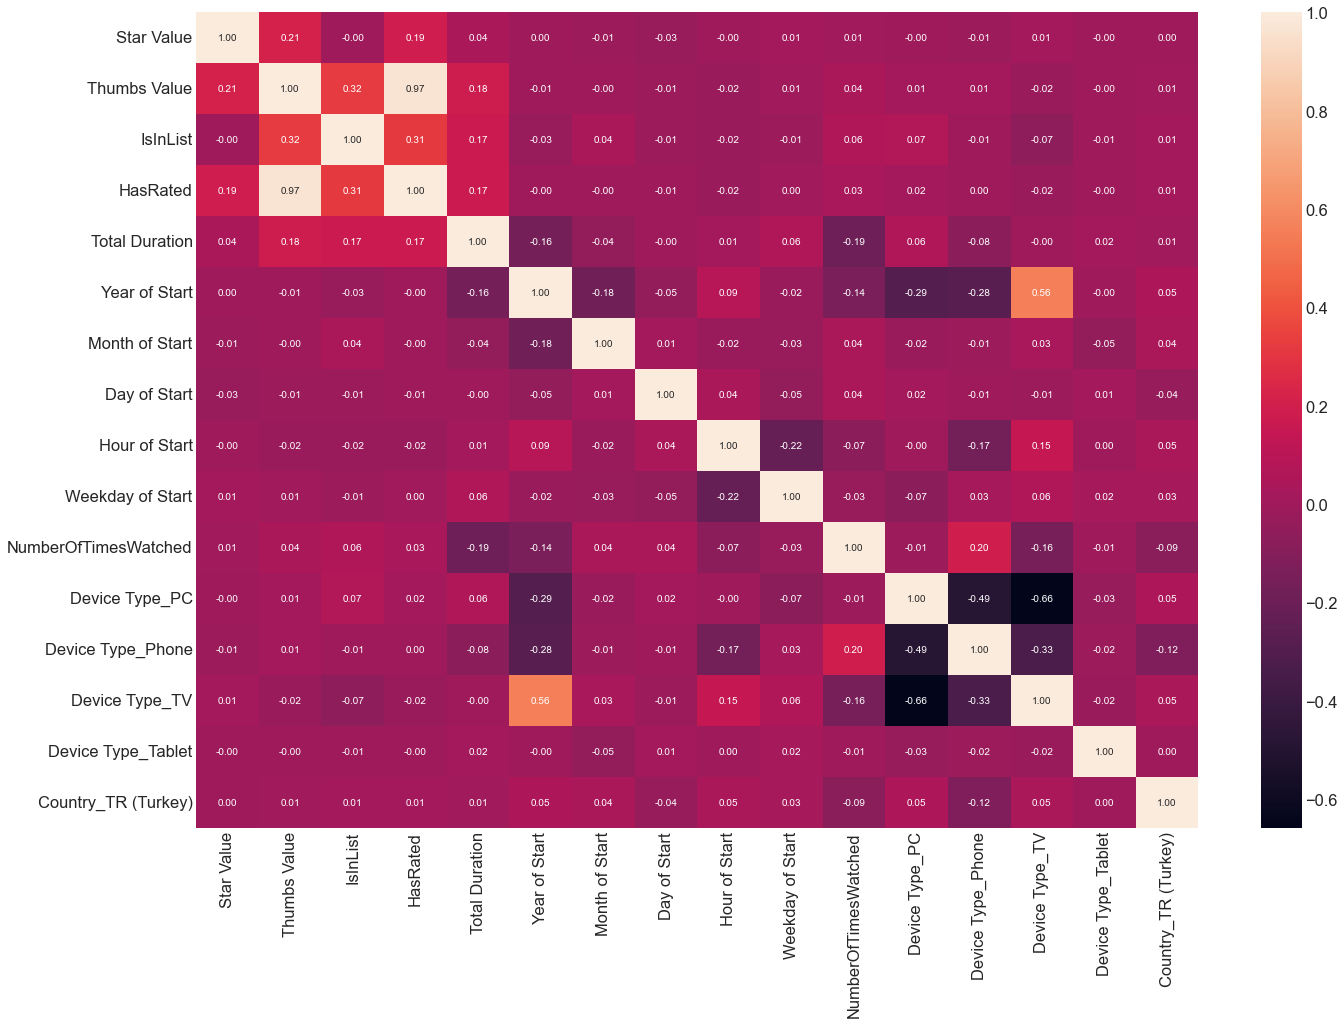

In [632]:
#convert categorical values to numerical using get_dummies() method
X = pd.get_dummies(df.drop(["Profile Name","Title"],axis=1),drop_first=True)
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(), annot=True,fmt=".2f")
plt.show()

* Thumbs Value and Has Rated has 0.97 correlation. This is understandable, since HasRated is 1 only user voted as thumbs up. HasRated value should be dropped

In [633]:
df = df.drop("HasRated",axis=1)

In [634]:
df.columns

Index(['Profile Name', 'Title', 'Device Type', 'Country', 'Star Value',
       'Thumbs Value', 'IsInList', 'Total Duration', 'Year of Start',
       'Month of Start', 'Day of Start', 'Hour of Start', 'Weekday of Start',
       'NumberOfTimesWatched'],
      dtype='object')

## Preprocessing  <a name="third-bullet"></a>

ML Algorithms takes numerical inputs for dependent variables. Title column includes over 4000 movies, so converting dummy variable will not be a wise choise. I will take only one time watched movies as data and make Title column index of the data.

In [635]:
df.shape

(6675, 14)

In [636]:
title_names = df["Title"].value_counts()

In [637]:
unique_title_names = np.where(title_names.values==1,title_names.index,0)

In [638]:
df_unique = df[df["Title"].isin(unique_title_names)]

In [639]:
df_unique.index = df_unique["Title"]

In [640]:
#drop NumberOfTimesWatched, since we take only unique titles in the data set
#drop Title, since we set it as index of dataframe
df_unique = df_unique.drop(["Title","NumberOfTimesWatched"],axis=1)

In [641]:
#split the data
y = df_unique["Profile Name"].replace([user1_name,user2_name],[0,1])
X = df_unique.drop(["Profile Name"], axis=1)

In [642]:
X.shape

(2522, 11)

In [643]:
X.columns

Index(['Device Type', 'Country', 'Star Value', 'Thumbs Value', 'IsInList',
       'Total Duration', 'Year of Start', 'Month of Start', 'Day of Start',
       'Hour of Start', 'Weekday of Start'],
      dtype='object')

In [644]:
#convert categorical values to numerical using get_dummies() method
X = pd.get_dummies(X,drop_first=True)

In [645]:
X.columns

Index(['Star Value', 'Thumbs Value', 'IsInList', 'Total Duration',
       'Year of Start', 'Month of Start', 'Day of Start', 'Hour of Start',
       'Weekday of Start', 'Device Type_Phone', 'Device Type_TV',
       'Country_TR (Turkey)'],
      dtype='object')

In [646]:
df.index.duplicated().sum()

0

### Train Test Split

In [647]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify =y, shuffle=True) 

### Feature Scaling

In [648]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Anomallly Detection  <a name="fifth-bullet"></a>

In this section, full dataset will be used for anomally detection.

I will use methods for anomally detection, and list the activities

In [649]:
#create full dataset by converting categorical values to numeric
df_full = pd.get_dummies(df_unique,drop_first=True)

In [650]:
df_full.head()

,Star Value,Thumbs Value,IsInList,Total Duration,Year of Start,Month of Start,Day of Start,Hour of Start,Weekday of Start,Profile Name_U2,Device Type_Phone,Device Type_TV,Country_TR (Turkey)
Title,,,,,,,,,,,,,
Brother in Love 2_hook_primary_16x9,0.0,0.0,0,0.15,2022,6,4,21,5,1,0,1,1
Season 1 Plot Clip: Erşan Kuneri,0.0,0.0,0,0.95,2022,6,4,21,5,1,0,1,1
The Way of the World_hook_02_16x9,0.0,0.0,0,0.07,2022,4,15,20,4,1,0,1,1
Season 3 Moment of High Emotion Clip: After Life,0.0,0.0,0,1.32,2022,4,15,20,4,1,0,1,1
The Taming of the Shrewd,0.0,0.0,0,8.30,2022,4,15,20,4,1,0,1,1


* Anomally Detection with Local Outlier Factor

In [651]:
from sklearn.neighbors import LocalOutlierFactor
# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(df_full)
LOF_scores = clf.negative_outlier_factor_

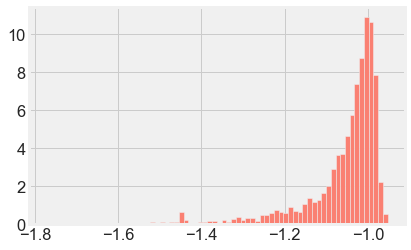

In [652]:
plt.hist(LOF_scores, bins = "auto", density = True)
plt.show()

In [653]:
LOF_scores.mean()

-1.0586768605866914

In [654]:
LOF_scores.mean() - (np.percentile(LOF_scores,q=3) - np.percentile(LOF_scores,q=1))*1.5

-1.2340137692159812

In [655]:
outliers_loc = df_full[LOF_scores<-1.23]

In [656]:
outliers_loc

,Star Value,Thumbs Value,IsInList,Total Duration,Year of Start,Month of Start,Day of Start,Hour of Start,Weekday of Start,Profile Name_U2,Device Type_Phone,Device Type_TV,Country_TR (Turkey)
Title,,,,,,,,,,,,,
Kardeş Payı: Season 1: 1. Bölüm (Episode 1),0.0,0.0,0,65.90,2022,3,20,15,6,1,0,1,1
Season 1 Cliffhanger Clip: Baking Impossible,0.0,0.0,0,0.17,2022,2,28,11,0,1,1,0,1
The Social Dilemma_PVS_MEGA,0.0,0.0,0,0.07,2022,2,28,11,0,1,1,0,1
(Un)Well: Season 1: Essential Oils (Episode 1),0.0,0.0,0,5.73,2021,12,4,22,5,1,1,0,1
School of Chocolate: Season 1: Breaking Molds and Bending Chocolate (Episode 1),0.0,0.0,0,15.07,2021,12,4,22,5,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
House of Cards: Season 4: Chapter 43 (Episode 4),0.0,0.0,0,38.92,2018,5,30,23,2,0,1,0,1
My Friend Rockefeller,0.0,0.0,0,13.68,2018,5,12,3,5,0,1,0,1
Trump: An American Dream: Season 1: Citizen Trump (Episode 3),0.0,0.0,0,48.53,2018,4,1,5,6,0,0,0,1


In [657]:
print(f"Local Outlier Factor methos found {outliers_loc.shape[0]} outliers")

Local Outlier Factor methos found 170 outliers


In [658]:
outliers_loc.describe().T

,count,mean,std,min,25%,50%,75%,max
Star Value,170.0,0.000000,0.000000,0.00,0.0,0.0,0.00,0.00
Thumbs Value,170.0,0.052941,0.293152,0.00,0.0,0.0,0.00,2.00
IsInList,170.0,0.047059,0.212390,0.00,0.0,0.0,0.00,1.00
Total Duration,170.0,13.618471,27.046043,0.02,0.2,3.6,7.57,149.52
Year of Start,170.0,2019.947059,1.147479,2017.00,2019.0,2020.0,2021.00,2022.00
Month of Start,170.0,6.141176,3.601949,1.00,3.0,6.0,9.00,12.00
Day of Start,170.0,14.388235,9.711329,1.00,5.0,14.0,22.75,31.00
Hour of Start,170.0,13.852941,6.333588,0.00,9.0,15.0,19.00,23.00
Weekday of Start,170.0,3.170588,2.183929,0.00,1.0,3.0,5.00,6.00
Profile Name_U2,170.0,0.129412,0.336647,0.00,0.0,0.0,0.00,1.00


* Anomally Detection with Isolation Forest

In [659]:
from sklearn.ensemble import IsolationForest

In [660]:
df_iso=df_full.copy()

In [661]:
model=IsolationForest(n_estimators=100, contamination=float(0.1))
model.fit(df_iso)

C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [662]:
df_iso["if_anomalies"] = model.predict(df_iso)

In [663]:
outliers_iso = df_iso.query("if_anomalies==-1")

In [664]:
print(f"Isolation Forest method found {outliers_iso.shape[0]} outliers")

Isolation Forest method found 253 outliers


In [665]:
outliers_iso.describe().T

,count,mean,std,min,25%,50%,75%,max
Star Value,253.0,0.015810,0.251478,0.00,0.00,0.00,0.00,4.00
Thumbs Value,253.0,0.154150,0.530753,0.00,0.00,0.00,0.00,2.00
IsInList,253.0,0.126482,0.333051,0.00,0.00,0.00,0.00,1.00
Total Duration,253.0,47.109012,43.817523,0.02,4.88,41.28,94.25,149.52
Year of Start,253.0,2019.739130,1.248464,2018.00,2019.00,2020.00,2021.00,2022.00
Month of Start,253.0,5.758893,3.553610,1.00,3.00,5.00,8.00,12.00
Day of Start,253.0,15.624506,9.857180,1.00,6.00,16.00,25.00,31.00
Hour of Start,253.0,15.584980,5.117439,1.00,12.00,17.00,19.00,23.00
Weekday of Start,253.0,3.731225,2.198235,0.00,2.00,5.00,6.00,6.00
Profile Name_U2,253.0,0.529644,0.500110,0.00,0.00,1.00,1.00,1.00


* Anomally Detection with One Class SVM

In [666]:
from sklearn.svm import OneClassSVM

In [667]:
df_ocs=df_full.copy()

In [668]:
ocs = OneClassSVM()

In [669]:
ocs.fit(df_ocs)

OneClassSVM()

In [670]:
df_ocs["ocs_anomalies"] = ocs.predict(df_ocs)

In [671]:
outliers_ocs = df_ocs[df_ocs["ocs_anomalies"]==-1]

In [672]:
print(f"One Class SVM {outliers_ocs.shape[0]} outliers")

One Class SVM 1267 outliers


In [673]:
outliers_ocs.describe().T

,count,mean,std,min,25%,50%,75%,max
Star Value,1267.0,0.003157,0.112376,0.00,0.00,0.00,0.00,4.00
Thumbs Value,1267.0,0.031571,0.246199,0.00,0.00,0.00,0.00,2.00
IsInList,1267.0,0.018153,0.133558,0.00,0.00,0.00,0.00,1.00
Total Duration,1267.0,25.899440,36.998082,0.02,0.12,0.42,54.94,149.52
Year of Start,1267.0,2020.254144,1.144451,2017.00,2020.00,2020.00,2021.00,2022.00
Month of Start,1267.0,5.887924,3.268173,1.00,3.00,5.00,8.00,12.00
Day of Start,1267.0,15.169692,9.195374,1.00,7.00,14.00,23.00,31.00
Hour of Start,1267.0,15.528808,4.166338,3.00,13.00,17.00,19.00,23.00
Weekday of Start,1267.0,3.853986,1.975759,0.00,2.00,4.00,6.00,6.00
Profile Name_U2,1267.0,0.141279,0.348446,0.00,0.00,0.00,0.00,1.00


# Predict the User Profiles   <a name="sixth-bullet"></a>

I will use 4 Machine Learning algorithms, listed below, for predicting the profile names from user activities data
* Logistic Regression
* Desicion Tree Classifier
* KNN Classifier
* Random Forest Classifier

In [698]:
#make scorer as f1_score to use for validation scoring method, since the data is highly imbalanced
scorer = make_scorer(f1_score)

#### Logistic Regression

In [675]:
logreg = LogisticRegression()
scoreCV_log = cross_val_score(logreg, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_log.mean()

0.9297894021395011

In [676]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [677]:
def plot_conf_mat(y_test, y_preds, title):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """

    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt="d")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix for "+title)
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

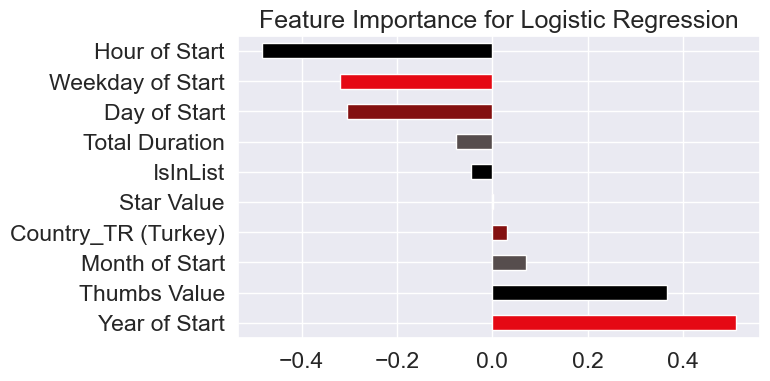

In [679]:
logco = pd.Series(logreg.coef_[0],index=X_train.columns).sort_values(ascending=False)[0:10];logco
plt.figure(dpi=100)
plt.title("Feature Importance for Logistic Regression")
logco.plot(kind="barh", color=colors)
plt.show()

#### Desicion Tree Classifier

In [680]:
dtc = DecisionTreeClassifier()
scoreCV_dtc = cross_val_score(dtc, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_dtc.mean()

0.9667715152205268

In [681]:
dtc = DecisionTreeClassifier(max_depth=5)

In [682]:
dtc.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=5)

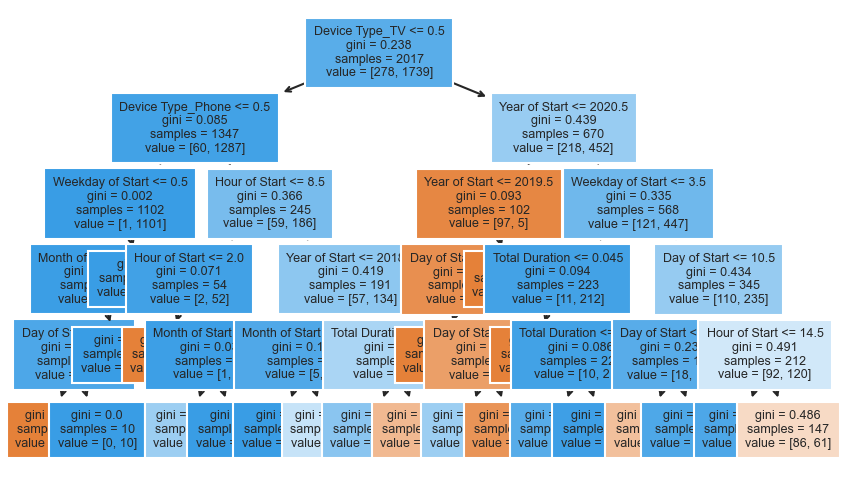

In [684]:
plt.figure(dpi=150)
_ = plot_tree(dtc,feature_names=X.columns, filled=True,fontsize=6)
plt.show()

#### KNN Classifier

In [685]:
knc = KNeighborsClassifier()
scoreCV_knc = cross_val_score(knc, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_knc.mean()

0.9573017728751086

#### Random Forest Classifier

In [688]:
rfc = RandomForestClassifier()
scoreCV_rfc = cross_val_score(rfc, X_train_scaled, y_train, scoring=scorer,
                             cv=KFold(n_splits=10, shuffle=True,
                                            random_state=1))
scoreCV_rfc.mean()

0.97712819906426

In [691]:
from sklearn import model_selection

In [692]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

In [699]:
models

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('RFC', RandomForestClassifier())]

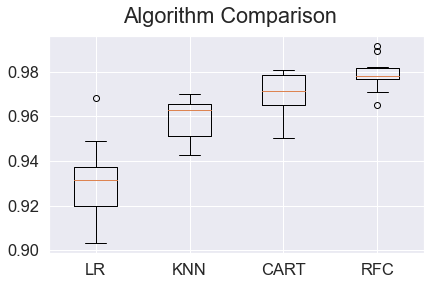

In [712]:
#plot boxplots from cross validation scores 
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scorer)
    results.append(cv_results)
    names.append(name)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Random Forest is the most successfull model predicting user profiles!

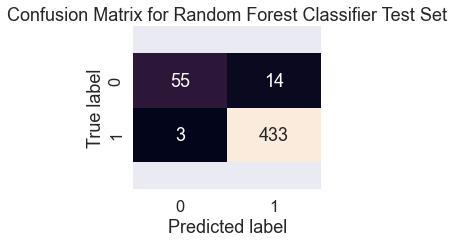

In [695]:
predictions = rfc.predict(X_test_scaled)
plot_conf_mat(y_test,predictions,"Random Forest Classifier Test Set")

In [696]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        58
           1       0.99      0.97      0.98       447

    accuracy                           0.97       505
   macro avg       0.90      0.96      0.92       505
weighted avg       0.97      0.97      0.97       505



<BarContainer object of 12 artists>

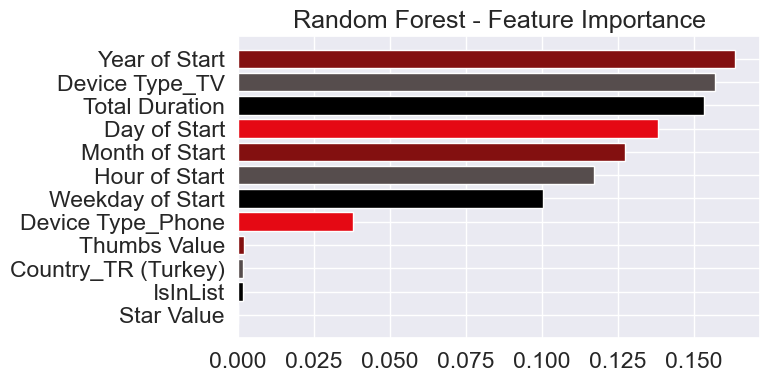

In [697]:
plt.figure(dpi=100)
# plot feature importance
plt.title(label="Random Forest - Feature Importance")
sorted_idx = rfc.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rfc.feature_importances_[sorted_idx],color=colors)

Year of Start, Device Type_TV and Total Duration feature are the most important features found by Random Forest Classifier